# STAT201 Project Final Report  -- Bike Sharing #

-- Group10 : Emma Zhan, Gary Wu, Sparsh Bajaj, Xinya Lu

# Introducton #

 - The dataset that we have decided to work on for our project is the **Bike Sharing Dataset**. This dataset contains the hourly and daily count of rental bikes between 2011 and 2012 in the Capital bikeshare system with the corresponding weather and seasonal information. The variables that we have decided to focus on for the purpose of our project are weekday, workingday, cnt, casual, and registered variables. 

- Our **research question** is; Is there a significant difference in bike rental users during workdays or non-workdays? We will be using the columns cnt (total number of users that day), and workingday (0 meaning not a working day, 1 meaning it is a working day). 

- In the study done by ShuiChao Zhang et al, it was found that rental duration between weekdays and weekends are **similar**. However, in the study done by Yang et al, the survey results show that there is a **decrease** in use of bikes during holidays.

- We are going to estimate the **population means** for our local parameter for both workingday and non-working day using 1000 bootstrap samples generated from one sample. Bootstrapping will help us induce sampling variation with one sample to replicate effects of sampling from a population. We decided to use Mean as our sample size is quite large so we can apply the central limit theorem and overall the distribution of the data is symmetrical.

- We have decided to use **standard deviation** as our scale parameter as we believe that using distributing the data based on standard deviation will easily allow us to identify any outliers in the data, identify how widely the data is spread around the mean value, and it provides a better variability as compared to range because it gives the measure of variation of the values from the mean of the dataset.

- Understanding if there are more users during workdays or non-workdays can help the company effectively allocate resources to days where there are more users. It can help them predict if there are days that more resources are required from consumers.


## Preliminary Results ## 

In [ ]:
# loading the library
library(tidyverse)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
# figure/table number generator
figure_table_number <- c(0, 0, 0, 0) # figureMajor, figureMinor, tableMajor, tableMinor

figure_number.nextMajor <- function(m="") {
    figure_table_number[1] <<- figure_table_number[1] + 1
    figure_table_number[2] <<- 0
    return (paste("Figure: ", figure_table_number[1], ".", figure_table_number[2], ". ", m, sep = ""))
}

figure_number.nextMinor <- function(m="") {
    figure_table_number[2] <<- figure_table_number[2] + 1
    return (paste("Figure: ", figure_table_number[1], ".", figure_table_number[2], ". ", m, sep = ""))
}


table_number.nextMajor <- function(m="") {
    figure_table_number[3] <<- figure_table_number[3] + 1
    figure_table_number[4] <<- 0
    return (paste("Table: ", figure_table_number[3], ".", figure_table_number[4], ". ", m, sep = ""))
}

table_number.nextMinor <- function(m="") {
    figure_table_number[4] <<- figure_table_number[4] + 1
    return (paste("Table: ", figure_table_number[3], ".", figure_table_number[4], ". ", m, sep = ""))
}


In [ ]:
# prepartion for the environment
# default_plot_width <- 7
# default_plot_height <- 7
default_plot_width <- 10
default_plot_height <- 10
set.seed(1)

options(repr.matrix.max.rows = 6)
options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

# some constants
# SAMPLE_SIZE = 731 # MAX 731
SAMPLE_SIZE = 73 # 731 * 0.1
confidence_level = 0.95

In [ ]:
# Clean and wrangle the data

# download zip file
zipFileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
temp <- tempfile()
download.file(zipFileUrl, temp)
# get the raw data
rawData <- read.csv(unz(temp, "hour.csv"))
unlink(temp)
# above code consult: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data
head(rawData)

# generate one sample
BikeSharingData <- rawData %>%
    group_by(dteday) %>%
    summarize(cnt = sum(cnt), workingday=mean(workingday)) %>%
    ungroup() %>%
    select(workingday, cnt) %>%
    mutate(isworkingday = (workingday == 1)) %>%
    mutate(isworkingday = as.factor(isworkingday)) %>%
    rep_sample_n(size = SAMPLE_SIZE) %>%
    ungroup() %>%
    select(isworkingday, cnt)

cat(table_number.nextMajor("table for one sample"))
head(BikeSharingData)
cat(table_number.nextMinor("table for one sample with only two columns (is working day and cnt)"))

#sample data for only working days
workingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="TRUE") %>% select(cnt)

#sample data for only non-working days
notworkingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="FALSE") %>% select(cnt)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


Table: 1.0. table for one sample

isworkingday,cnt
<fct>,<int>
TRUE,5992
TRUE,4362
TRUE,5260
FALSE,7132
TRUE,3894
TRUE,4120


Table: 1.1. table for one sample with only two columns (is working day and cnt)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


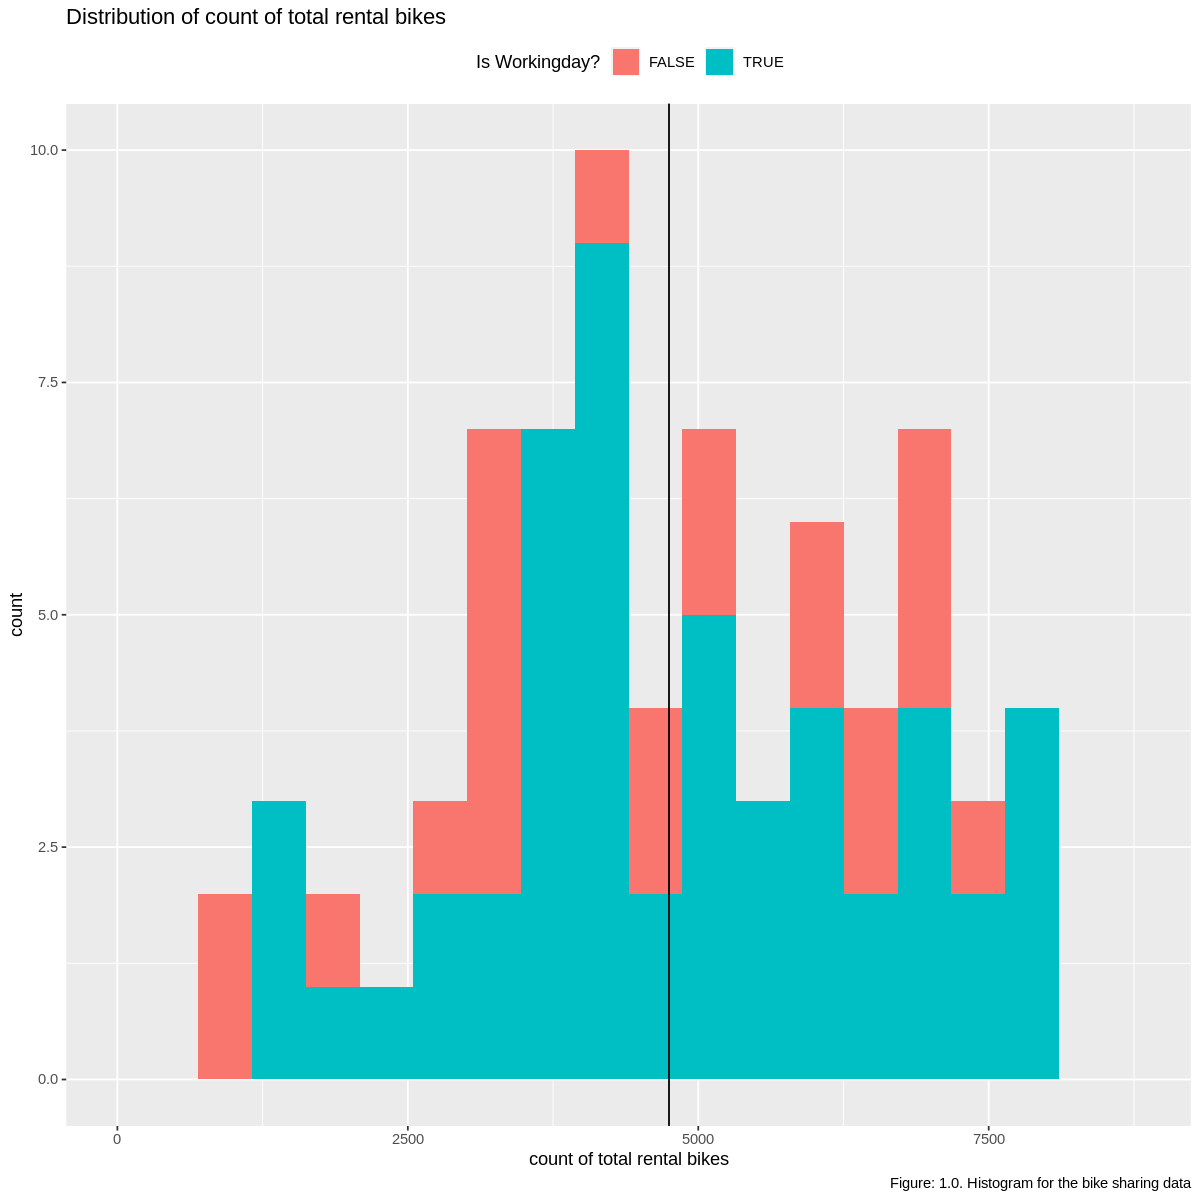

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


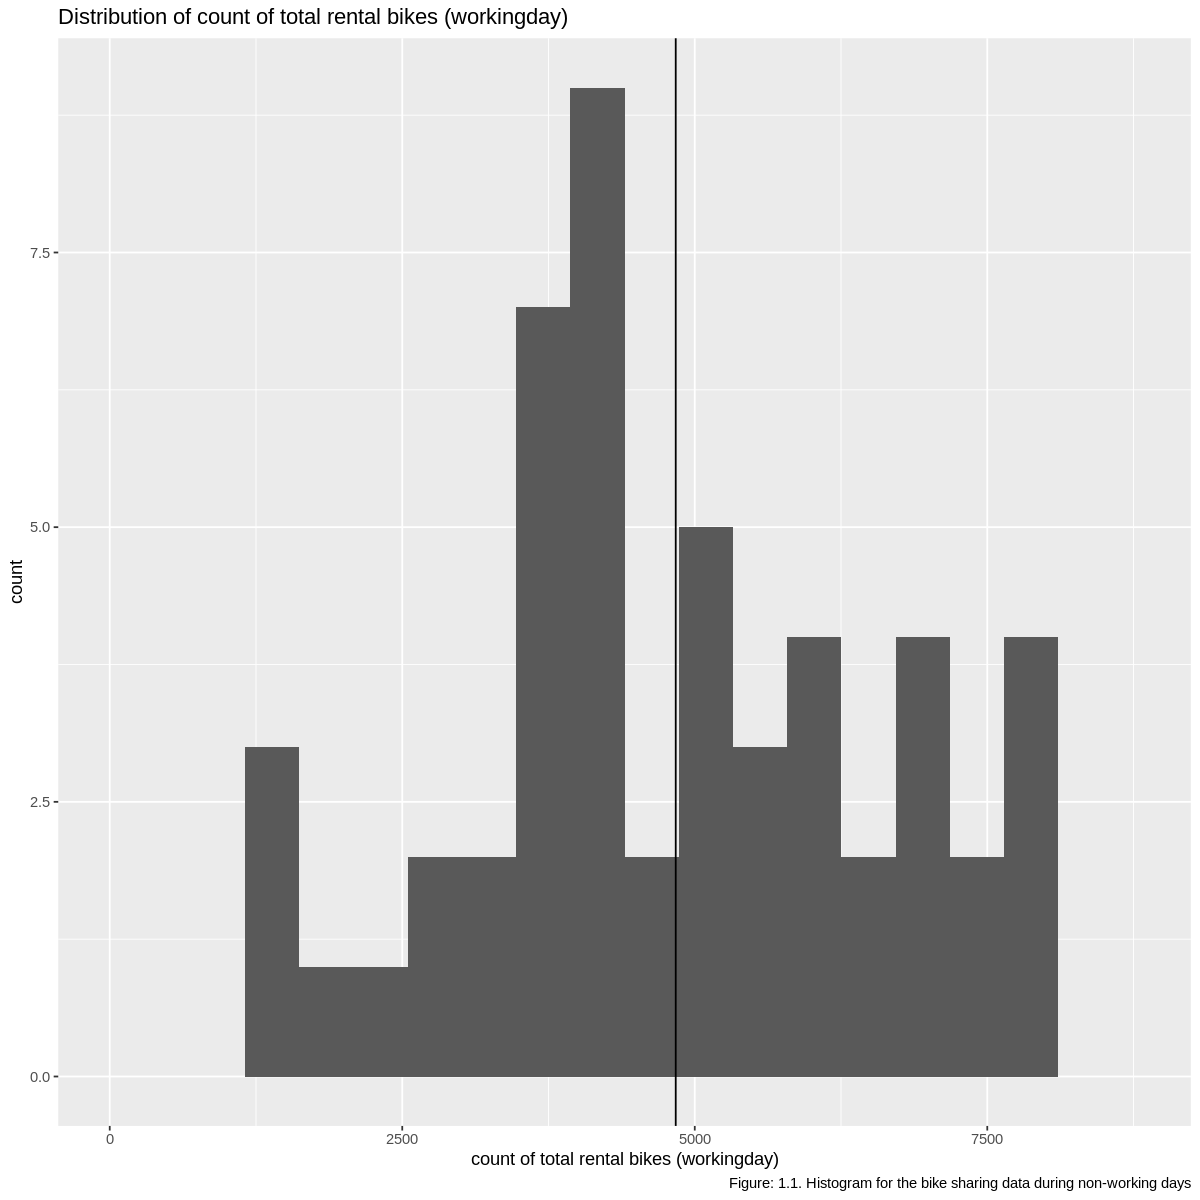

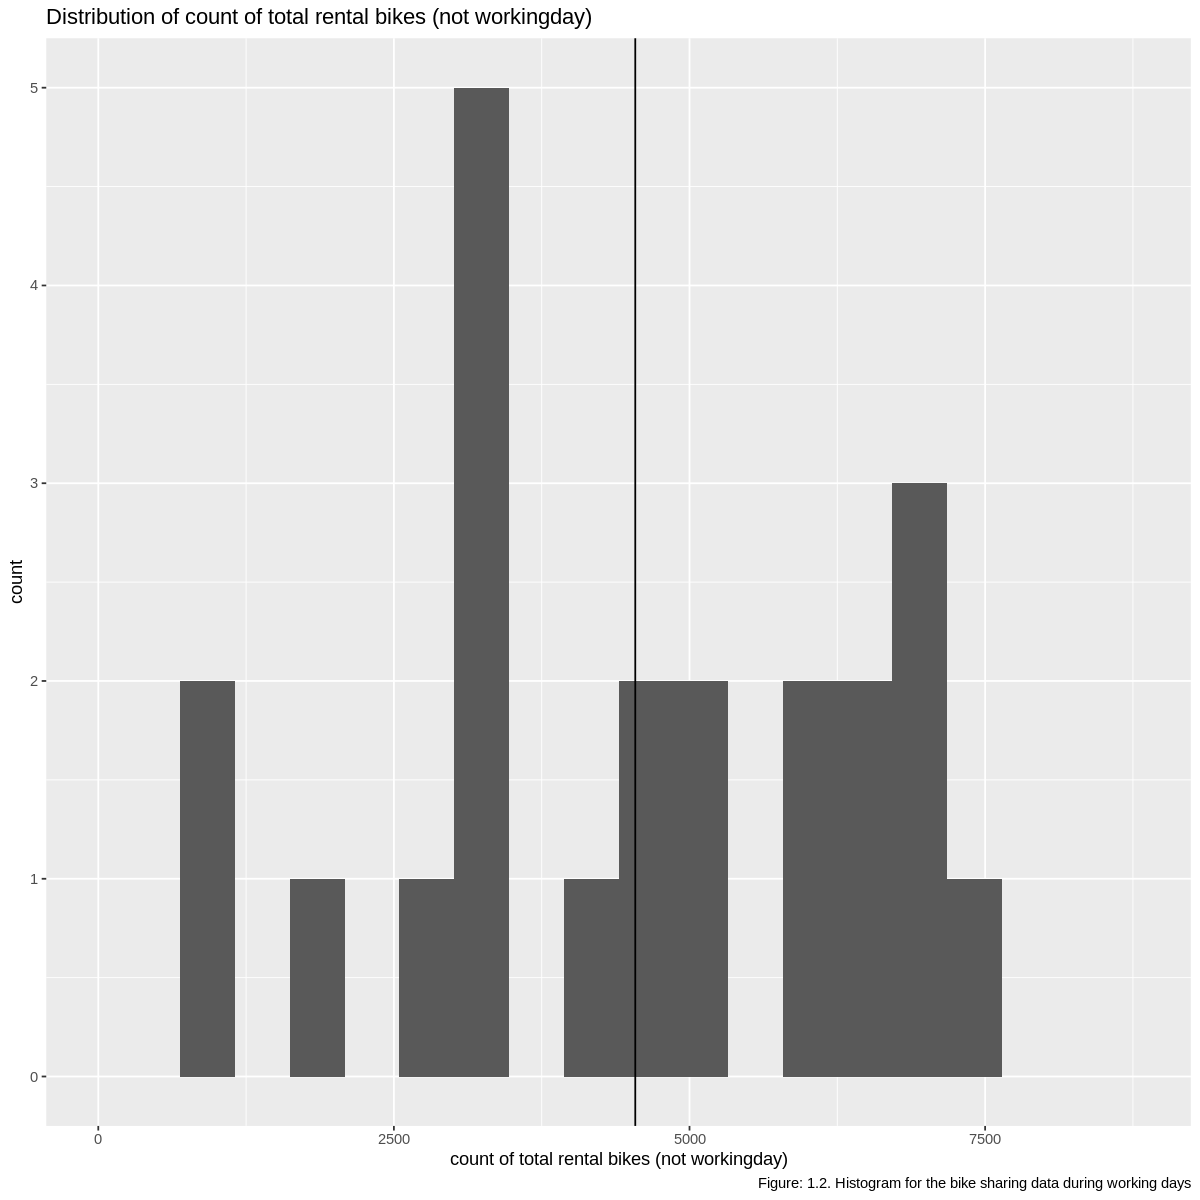

In [ ]:
# historgram for all bike sharing data
all_BikeSharingData_hist <- ggplot(BikeSharingData, 
                                   aes(x = cnt, fill = isworkingday)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes", fill="Is Workingday?") +
  ggtitle("Distribution of count of total rental bikes") +
  geom_vline(xintercept = mean(BikeSharingData$cnt)) +
  theme(legend.position="top") +
  xlim(0, 8800)+
  labs(caption = figure_number.nextMajor("Histogram for the bike sharing data"))
  

all_BikeSharingData_hist

# histogram for all biking sharing data during the non-working days
holiday_BikeSharingData_hist <- ggplot(workingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (workingday)") +
  ggtitle("Distribution of count of total rental bikes (workingday)") +
  geom_vline(xintercept = mean(workingday_BikeSharingData$cnt)) +
  xlim(0, 8800)+
  labs(caption = figure_number.nextMinor("Histogram for the bike sharing data during non-working days"))

  
holiday_BikeSharingData_hist

# histogram for all biking sharing data during workdays
notHoliday_BikeSharingData_hist <- ggplot(notworkingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (not workingday)") +
  ggtitle("Distribution of count of total rental bikes (not workingday)")+
  geom_vline(xintercept = mean(notworkingday_BikeSharingData$cnt)) +
  xlim(0, 8800)+
  labs(caption = figure_number.nextMinor("Histogram for the bike sharing data during working days"))
notHoliday_BikeSharingData_hist

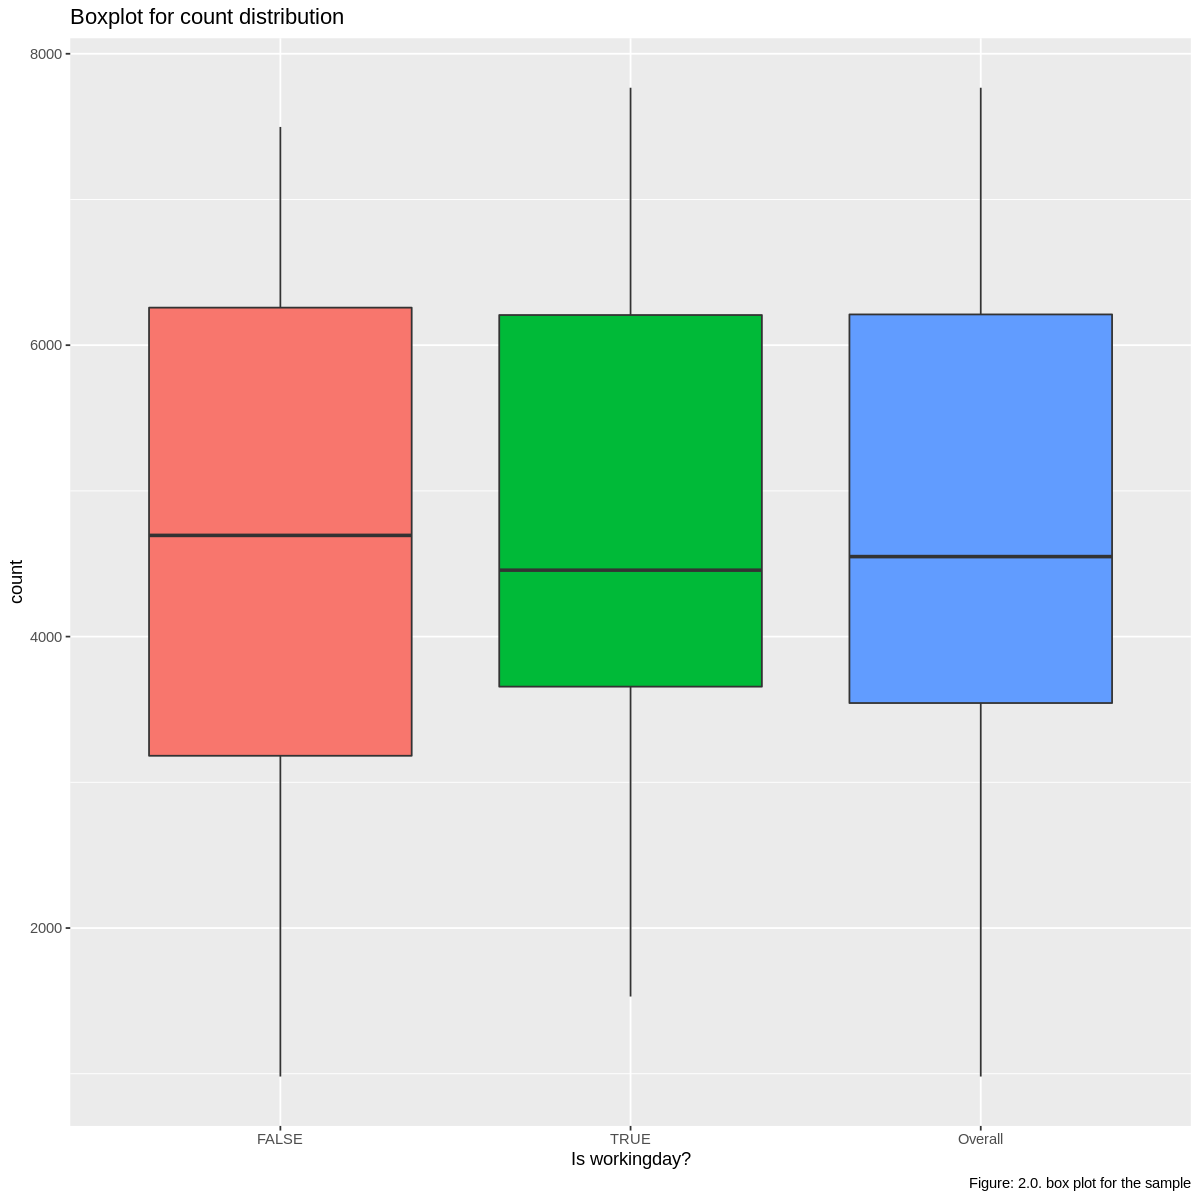

In [ ]:
# boxplot using the raw data
boxplot <- ggplot(
    rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")), 
    aes(x=isworkingday, y=cnt, fill=isworkingday)) +
    geom_boxplot() +
    theme(legend.position="none",) +
    labs(x="Is workingday?", 
         y="count",
         fill = "") +
    ggtitle("Boxplot for count distribution")+
    labs(caption = figure_number.nextMajor("box plot for the sample"))
boxplot

In [ ]:
#present the location parameter(mean) and the scale parameter(standard deviation)
parameters <- rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")) %>%
    group_by(isworkingday) %>%
    summarize(mean= mean(cnt), 
              sd= sd(cnt))
parameters
cat(table_number.nextMajor("table for the mean and standard deviation for both working day and non working day"))

isworkingday,mean,sd
<fct>,<dbl>,<dbl>
FALSE,4541.364,1997.093
TRUE,4837.294,1756.747
Overall,4748.110,1823.496


Table: 2.0. table for the mean and standard deviation for both working day and non working day

## Methods: Plan ##

- Our plan for the project is to conduct a hypothesis test to determine if there is a **significant difference** in the number of registered bike users during weekdays (wk) and workdays (wr). Thus, for our project, our null hypothesis will be wk=wr and our alternate hypothesis will be  wk not equal to wr.  The significance level we plan to use in our study is 5% significance level. 

- We expect to find a significant difference in our results as we expect the number of users to be **higher** during workdays as compared to weekends. We believe that more people will make use of the Bike Sharing services during Workdays to commute to work and as Workdays are in general busier when compared to Weekends. 

- Such findings could have significant impact on the business model of the company providing Bike Sharing Services. If it is proven that their services have more demand during the Workdays then they will need to meet up with the increase in demand during Workdays by increasing the supply of available shared bikes during Workdays.

- Some future questions that this study could lead to are : 1. Do seasons affect the number of Bike Users? and 2. Does the time of the day have an impact on the Number of Bike Users?

In [ ]:
# generate sample mean
sample_mean <- mean(BikeSharingData$cnt)

# generate 1000 bootstrap samples using infer workflow and get the sample means
bootstrap_dist <- BikeSharingData %>% 
    specify(response = cnt) %>%
    generate(type = "bootstrap", reps = 1000) %>% 
    calculate(stat = "mean")

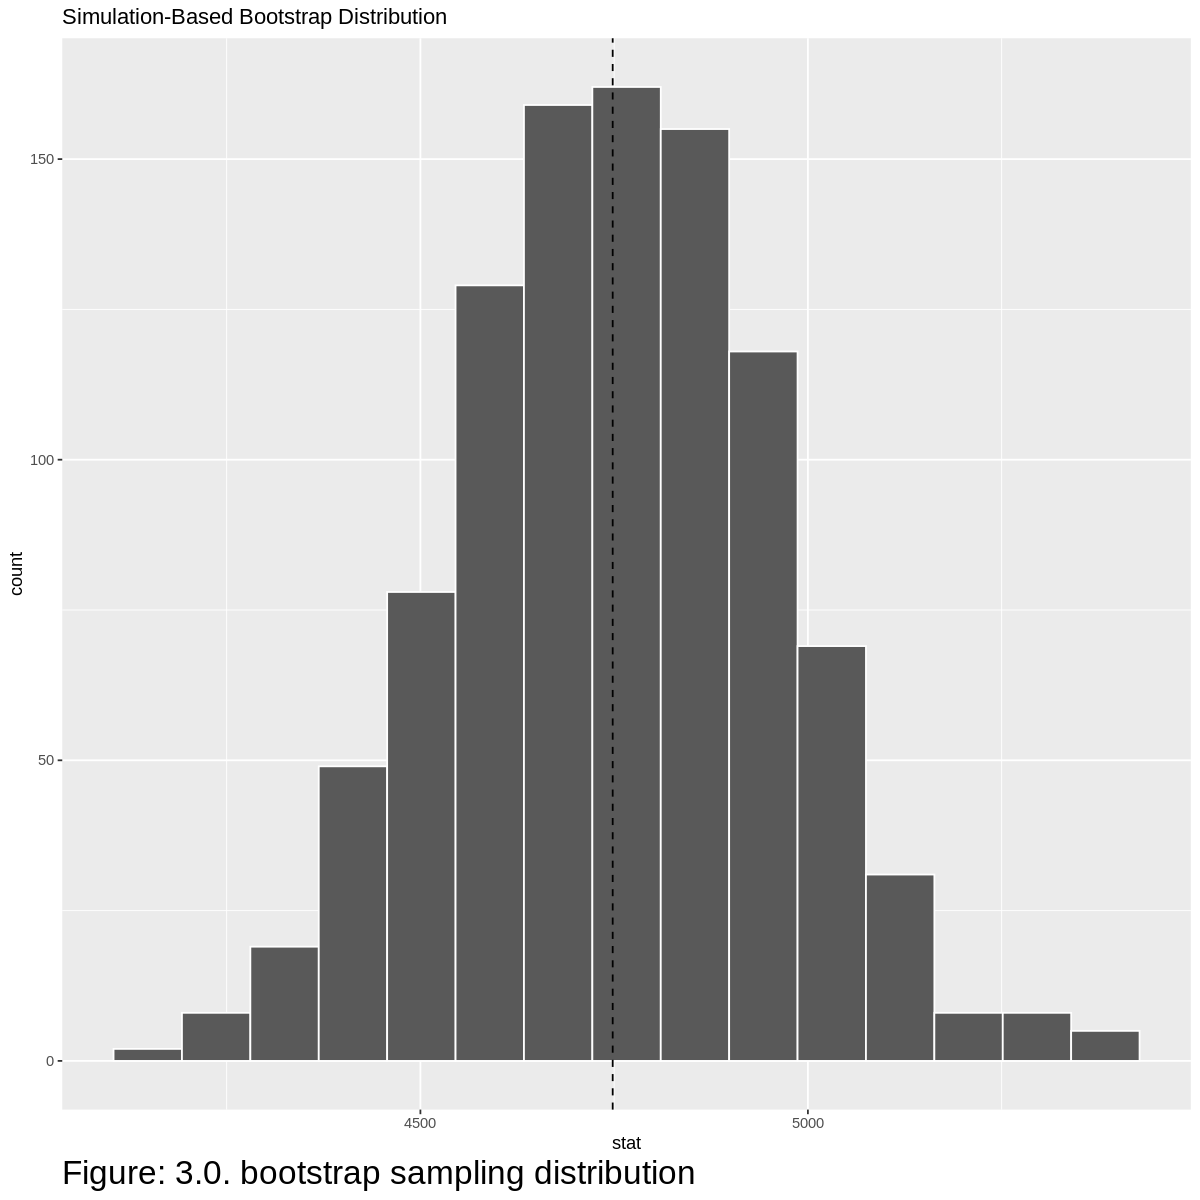

In [ ]:
# visualization
visualize(bootstrap_dist) + 
geom_vline(xintercept = sample_mean, linetype = "dashed")  +
labs(caption = figure_number.nextMajor("bootstrap sampling distribution")) +
theme(plot.caption = element_text(size = 20, hjust = 0))

In [ ]:
# get the confidence interval using percentile mothed
ci_percentile <- bootstrap_dist %>% 
    get_confidence_interval(level = confidence_level, type = "percentile")
ci_percentile
cat(table_number.nextMajor("table for bootstrap confidence interval"))

lower_ci,upper_ci
<dbl>,<dbl>
4354.495,5134.448


Table: 3.0. table for bootstrap confidence interval

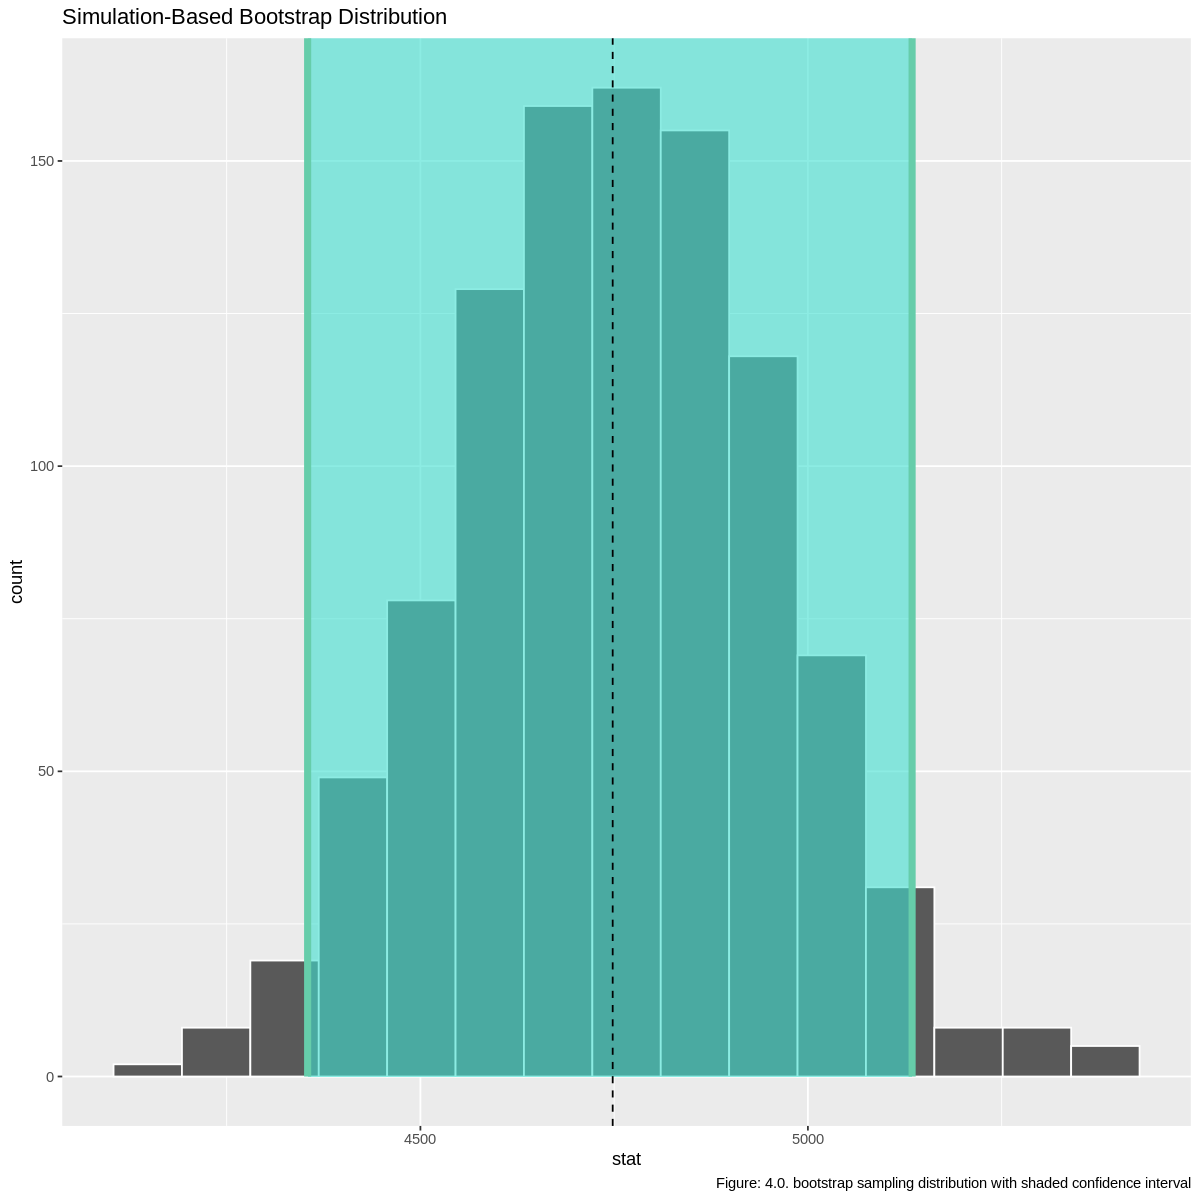

In [ ]:
ci_plot_percentile <-  visualize(bootstrap_dist) + 
shade_confidence_interval(endpoints = ci_percentile) +
labs(caption = figure_number.nextMajor("bootstrap sampling distribution with shaded confidence interval")) +
geom_vline(xintercept = sample_mean, linetype = "dashed")

ci_plot_percentile

In [ ]:
# get confidence interval using SE mothed
ci_se <- bootstrap_dist %>% 
    get_confidence_interval(point_estimate = sample_mean, level = confidence_level, type = "se")
ci_se
cat(table_number.nextMajor("table for confidence interval using SE method"))

lower_ci,upper_ci
<dbl>,<dbl>
4346.563,5149.656


Table: 4.0. table for confidence interval using SE method

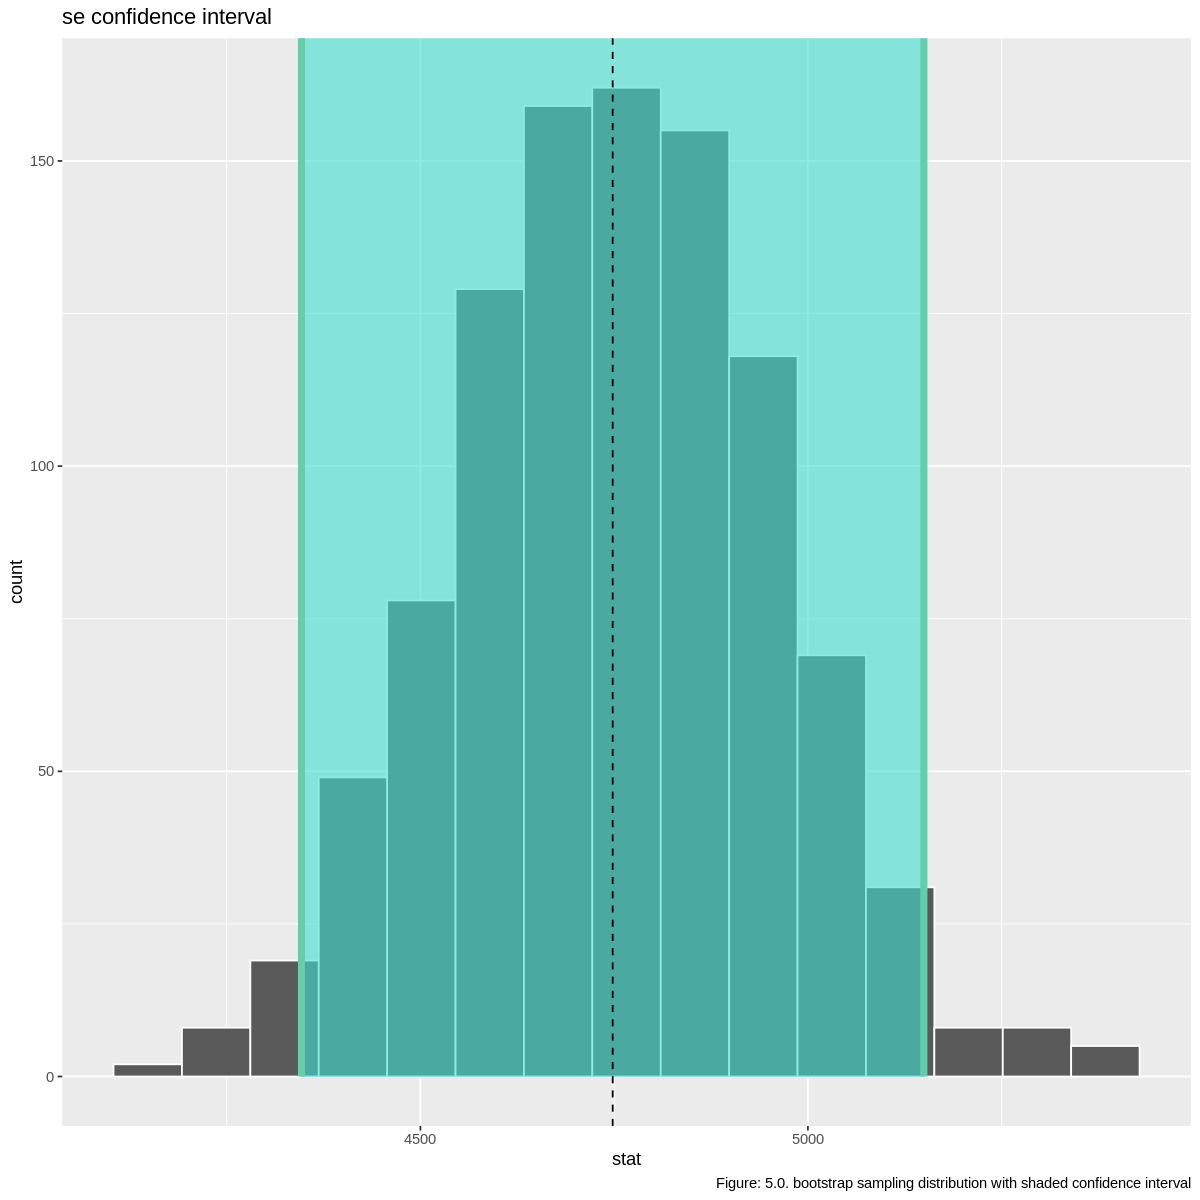

In [ ]:
# visualization
ci_plot_se <-  visualize(bootstrap_dist) + 
  shade_confidence_interval(endpoints = ci_se) +
    geom_vline(xintercept = sample_mean, linetype = "dashed") +
    labs(caption = figure_number.nextMajor("bootstrap sampling distribution with shaded confidence interval"))+
    ggtitle("se confidence interval")

ci_plot_se

In [ ]:
# get the confience interval using CLT

# calculate the sample standard deviation
sample_sd <- sd(BikeSharingData$cnt)

# calculate the standard error
se <- (sample_sd / sqrt(nrow(BikeSharingData)))

# lower bound for the confidence interval
lower_ci <- sample_mean + qnorm((1-confidence_level)/2) * se

# upper bound for the confidence interval
upper_ci <- sample_mean + qnorm((1-(1-confidence_level)/2)) * se

clt_ci <- tibble(lower_ci, upper_ci)
clt_ci
cat(table_number.nextMajor("table for confidence interval using CLT"))

lower_ci,upper_ci
<dbl>,<dbl>
4329.806,5166.413


Table: 5.0. table for confidence interval using CLT

In [ ]:
# get confidence interval using t distribution
df_t <- nrow(BikeSharingData) - 1

# lower bound for the confidence interval
lower_ci <- sample_mean + qt((1-confidence_level)/2, df_t) * se

# upper bound for the confidence interval
upper_ci <- sample_mean + qt((1-(1-confidence_level)/2), df_t) * se

t_ci <- tibble(lower_ci, upper_ci)
t_ci
cat(table_number.nextMajor("table for confidence interval using t distribution"))

lower_ci,upper_ci
<dbl>,<dbl>
4322.656,5173.563


Table: 6.0. table for confidence interval using t distribution

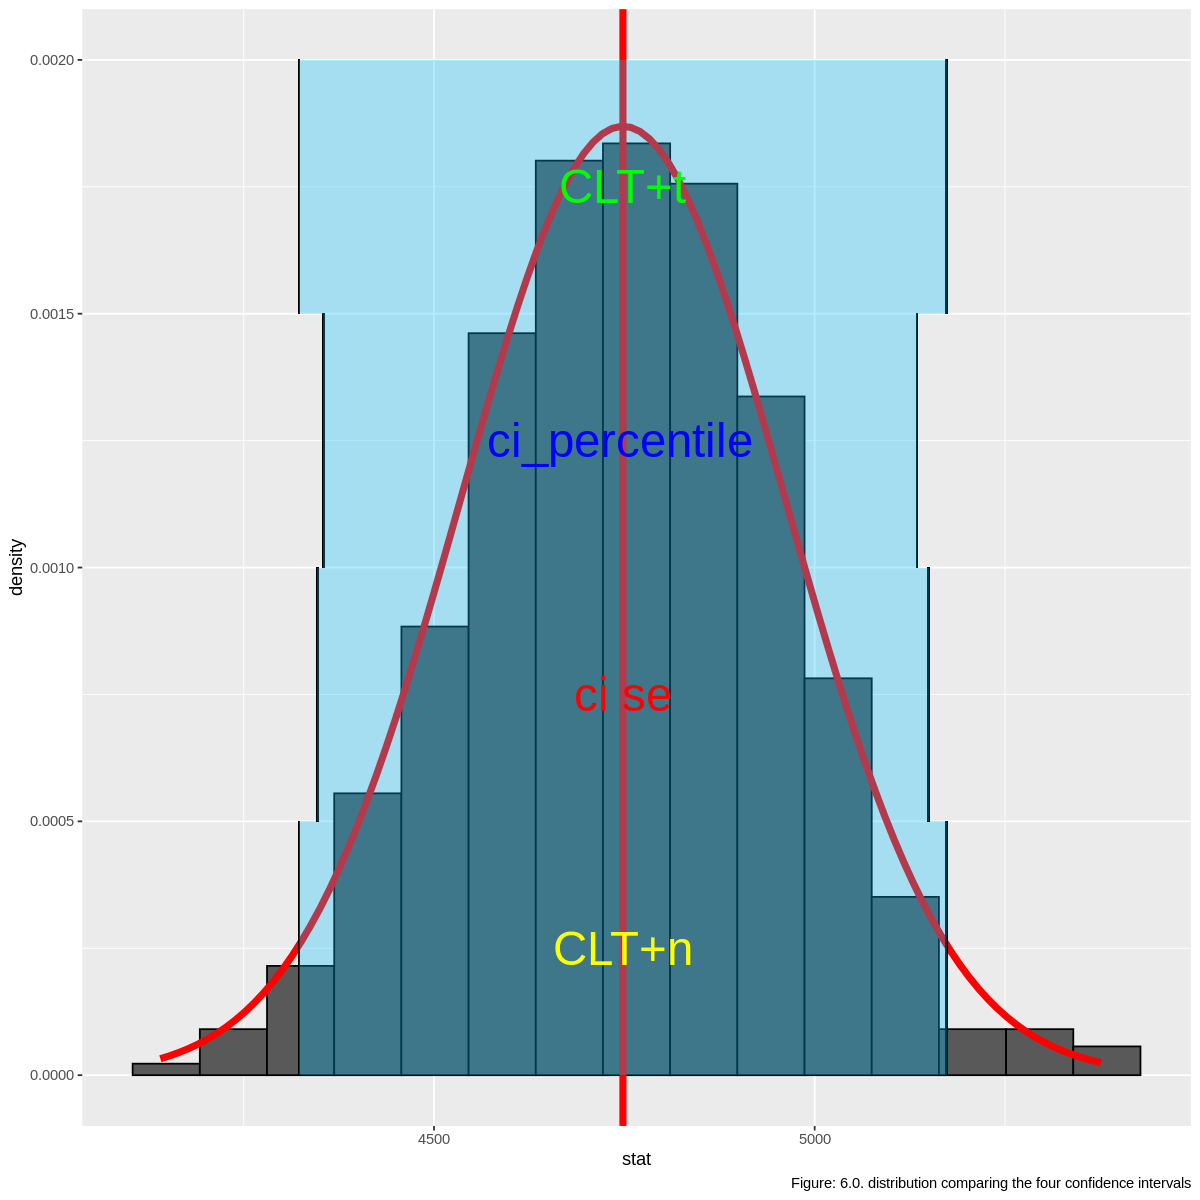

In [ ]:
# Compare CI

h <- 0.0005
ggplot(bootstrap_dist, aes(x=stat)) + 
geom_histogram(aes(y = ..density..), bins = 15, colour = "black") + 
stat_function(fun = dnorm, args = list(mean = sample_mean, sd = se),
              color = "red", lwd = 2) +
  geom_vline(xintercept = sample_mean, color = "red", lwd = 2) +
  geom_segment(aes(x=lower_ci, xend=lower_ci, y=0, yend =h)) +
  geom_segment(aes(x=upper_ci, xend=upper_ci, y=0, yend =h)) +
    annotate("rect", xmin = lower_ci, xmax = upper_ci, ymin = 0, ymax = 0.0005,
             fill = "deepskyblue",
             alpha = 0.3) +
    annotate("text", x=(upper_ci+lower_ci)/2, y=h/2, label="CLT+n", size = 10, color="yellow") +
labs(caption = figure_number.nextMajor("distribution comparing the four confidence intervals")) +
  
geom_segment(aes(x=ci_se$lower_ci, xend=ci_se$lower_ci, y=h, yend =2*h)) +
  geom_segment(aes(x=ci_se$upper_ci, xend=ci_se$upper_ci, y=h, yend =2*h)) +
    annotate("rect", xmin = ci_se$lower_ci, xmax = ci_se$upper_ci, ymin = h, ymax = 2*h,
             fill = "deepskyblue",
             alpha = 0.3) +
    annotate("text", x=(ci_se$upper_ci+ci_se$lower_ci)/2, y=h/2+h, label="ci se", size = 10, color="red") +

geom_segment(aes(x=ci_percentile$lower_ci, xend=ci_percentile$lower_ci, y=2*h, yend =3*h)) +
  geom_segment(aes(x=ci_percentile$upper_ci, xend=ci_percentile$upper_ci, y=2*h, yend =3*h)) +
    annotate("rect", xmin = ci_percentile$lower_ci, xmax = ci_percentile$upper_ci, ymin = 2*h, ymax = 3*h,
             fill = "deepskyblue",
             alpha = 0.3) +
    annotate("text", x=(ci_percentile$upper_ci+ci_percentile$lower_ci)/2, y=h/2+2*h, label="ci_percentile", size = 10, color="blue") + 



geom_segment(aes(x=lower_ci, xend=lower_ci, y=3*h, yend =4*h)) +
  geom_segment(aes(x=upper_ci, xend=upper_ci, y=3*h, yend =4*h)) +
    annotate("rect", xmin = lower_ci, xmax = upper_ci, ymin = 3*h, ymax = 4*h,
             fill = "deepskyblue",
             alpha = 0.3) +
    annotate("text", x=(lower_ci+upper_ci)/2, y=h/2+3*h, label="CLT+t", size = 10, color="green")


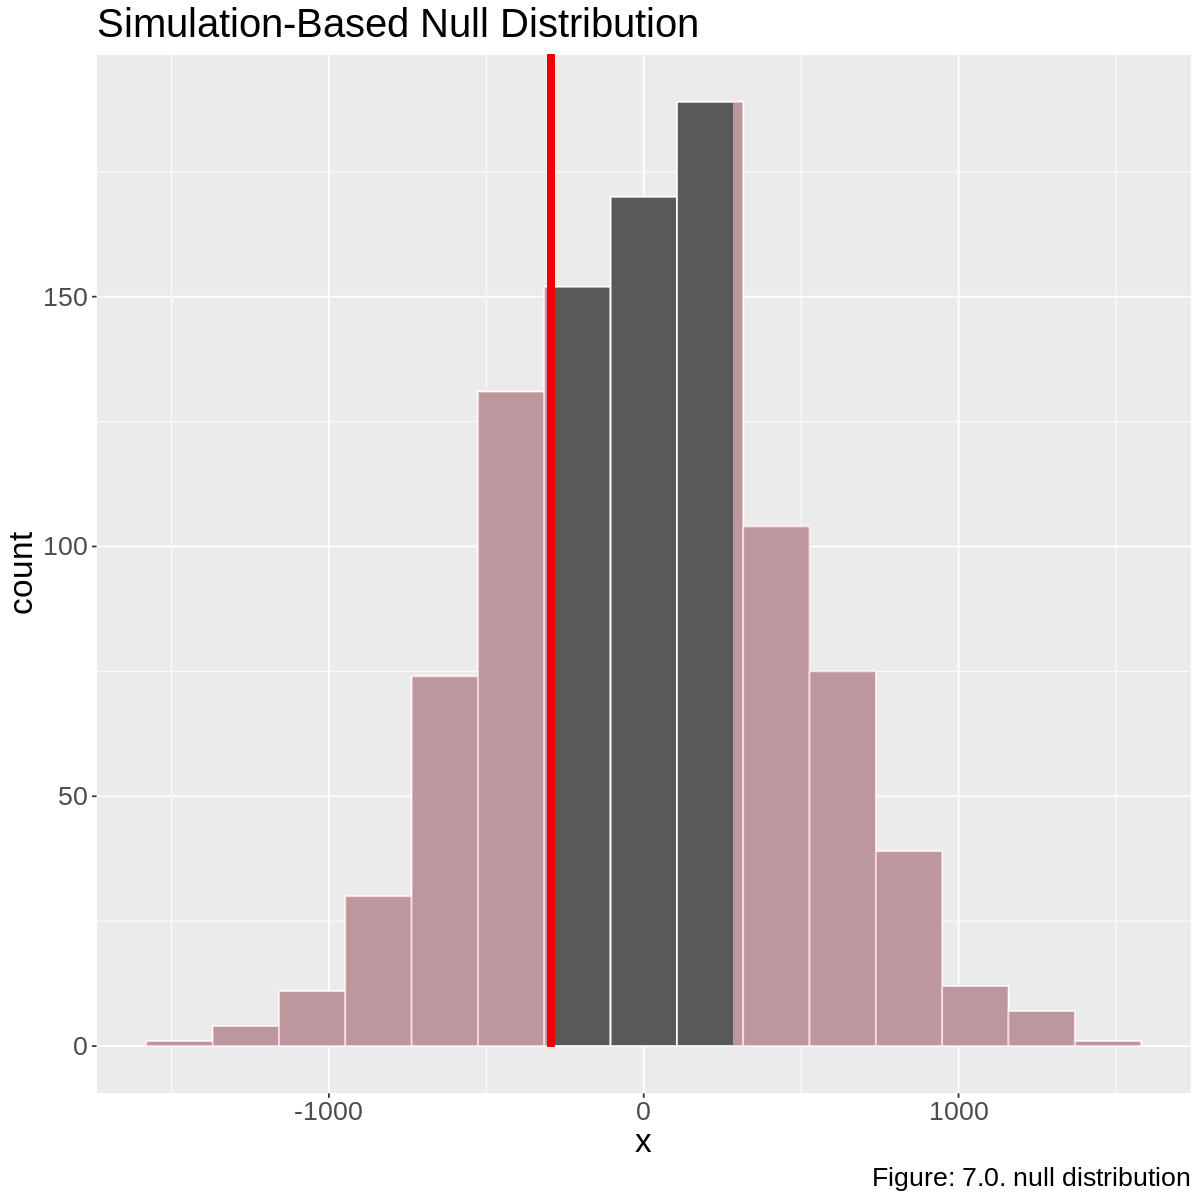

In [ ]:
# Hypothesis test
# assume independent, the mean of the count of total rental bikes per day is NOT dependent on workingday or not.
# H_0, mean(is NOT workingday) -  mean(is workingday) = 0
# H_A, mean(is NOT workingday) -  mean(is workingday) != 0
# α = 5%
obs_diff_means <- BikeSharingData %>% 
  specify(formula = cnt ~ isworkingday) %>% 
  calculate(stat = "diff in means", order = c("FALSE", "TRUE"))

null_infer <- BikeSharingData %>% 
  specify(formula = cnt ~ isworkingday) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("FALSE", "TRUE"))

null_plot_infer <- null_infer %>% 
  visualize() + 
  shade_p_value(obs_stat = obs_diff_means, direction = "both") +
  xlab("x") + 
  theme(text = element_text(size=20))+
  labs(caption = figure_number.nextMajor("null distribution")) 
  
null_plot_infer


In [ ]:
# get the p-value 
get_p_value(null_infer, obs_stat = obs_diff_means, direction = "both")
cat(table_number.nextMajor("table for p-value"))

p_value
<dbl>
0.526


Table: 7.0. table for p-value

In [ ]:
# hypothesis testing using t.test
library(broom)
tidy(t.test(x = workingday_BikeSharingData$cnt,
        y = notworkingday_BikeSharingData$cnt),
    )
cat(table_number.nextMajor("table for summary using t.test"))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
295.9305,4837.294,4541.364,0.6018094,0.5511053,35.68891,-701.6554,1293.516,Welch Two Sample t-test,two.sided


Table: 8.0. table for summary using t.test

## Interpreation ##


## Discussion ##

- Since the p-value is 0.526, we **fail to reject** the null hypothesis at 5% significance level.  Thus, this means our sample did not provide sufficient information to show there is a difference between the registered bike users during the workdays and non-working days. Knowing this, bike companies would not need to allocate more bikes to workdays compared to non-work days. From the results of this project, it suggests that bike rental usage is consistent between working days and non-working days. 

- The results we got are **not** what we expected to find as we were expecting to find a significant difference in the number of registered users during non-work days and working days with a p-value lower than 0.05. We anticipated that users would be much more likely to use the bike sharing services during working days as they would be more likely to commute to work during this time and this would result in more use scenarios for the bikes. 

- We can use other columns of data in this bike dataset to investigate factors that could contribute to the use of bikes by registered users between working days and non-working days. Even though our results show that there is no significant difference between the number of registered users between non-work days and working days, we could continue to look for other factors that could have a significant effect on usage of bike rentals. We could study the correlation between weather and usage, holiday and usage, and which months have higher usages. 


## Reference ##

Bike Sharing Dataset Data Set . UCI Machine Learning Repository: Bike sharing dataset data set. (n.d.). Retrieved October 31, 2022, from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset 

Zhang, S., He, K., Dong, S., &amp; Zhou, J. (2016, February 15). Modeling the distribution characteristics of urban public bicycle rental duration. Discrete Dynamics in Nature and Society. Retrieved October 26, 2022, from https://www.hindawi.com/journals/ddns/2016/8947525/ 

Yang, L., Shen, Q., &amp; Li, Z. (2016, July 19). Comparing travel mode and trip chain choices between holidays and weekdays. Transportation Research Part A: Policy and Practice. Retrieved October 26, 2022, from https://www.sciencedirect.com/science/article/pii/S0965856416301781 